# Python for Data Science, Level I
### *Session \#7*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Pandas Review

### Warm Ups

---

**Importing pandas:** `import pandas as pd`

**Dataframe from Excel sheet:** `df = pd.read_excel("titanic.xlsx")`

**Boolean filter on rows:** 
```python
over_21 = df['age'] >= 21
df[over_21]
```

**Aggregate column with Numpy function:** `df['fare'].mean()`

**Create a new column:** `df['lone_adult_male'] = (df['alone'] == True) & (df['sex'] == 'male')`

**Aggregate column with Numpy function:** `df['fare'].mean()`

## Exercises
---
**1. What was the average fare paid by survivors? What was the average fare among those that didn't survive?**

In [10]:
living = df['survived'] == 1
df[living]['fare'].mean()
df[~living]['fare'].mean()

22.117886885245877

**2. Create a new Boolean filter** `minor` **which is** `True` **for passengers who are under 18 years old**

In [ ]:
no_age = df['age'].isnull()

minor = (df['age'] < 18)

**3. What was the survival rate of minors aboard the Titanic?**

In [ ]:
raw_num = df[minor]['survived'].mean()
pretty_percent = round(raw_num, 4) * 100

print("Percent survived: "+str(pretty_percent))

**4. What was the survival rate among those who were NOT minors?**

Hint: You can use the ~ operator to reverse a Boolean filter.

In [ ]:
df[~minor]['survived'].mean()

**5. What was the average fare paid by men? By women?**

In [ ]:
men = df['who'] == 'man'
women = df['who'] == 'woman'

df[men]['fare'].mean()
df[women]['fare'].mean()

**6. What was the average age of 1st class passengers? 3rd class?**

In [ ]:
first_class = df['pclass'] == 1
third_class = df['pclass'] == 3

df[first_class]['age'].mean()
df[third_class]['age'].mean()

### Extra Credit
---
**1. Create a new column called** `senior` **which is** `True` **for those over 55. What is the survival rate for seniors?**

In [35]:
df['senior'] = (df['age'] > 55)
df[df['senior']]['survived'].mean()

df[df['senior']]['survived'].sum() / len(df[df['senior']])

0.3

## II. Groupby 


### Warm Ups
---
**Get frequency of each unique value in column:** `counts = df['who'].value_counts()`

**Grab by row index:** `counts.loc['man']`

**Group by a column:** `df.groupby('who')['fare'].mean()`

### Exercises
---
**1. Use a boolean filter and** `value_counts()` **to find the number of women in 1st, 2nd and 3rd class. Now how about for men?**

In [ ]:
women = df['who'] == 'woman'
men = df['who'] == 'man'

df[women]['pclass'].value_counts()
df[men]['pclass'].value_counts()

**2. Groupby the** `who` **column and find the average value of** `survived`, **i.e. the rate of survival**

In [73]:
df.groupby("who")['survived'].mean()

**3. Use a groupby to sum up the number of survivors by class**

In [78]:
df.groupby("class")['survived'].sum()

,survived
class,
First,136
Second,87
Third,119


**4. What about the surivival rate by class? Use** `.mean()` **to aggregate this time instead.**

In [79]:
df.groupby("class").mean()

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


**5. Find the most expensive ticket purchased within each class.** 

Hint: You'll need to create a dataframe from just the `class` and `fare` columns first.

In [5]:
df.groupby("class")['fare'].max()

class
First     512.3292
Second     73.5000
Third      69.5500
Name: fare, dtype: float64

**6. Find the total amount of money collected from passengers from each** `embark_town` 

In [ ]:
df.groupby("embark_town")["fare"].sum()

### Extra Credit
---

**1. When performing a groupby, you can use** `.agg()` **instead of the normal Numpy methods like** `.sum()` **or** `.mean()`

**If you use** `.agg()`**, you can apply multiple aggregators at once by giving a list of their names, eg:** `df.groupby('sex').agg(['sum', 'count'])` 

**Do a groupby to find the** `count` **and** `sum` **of the survived column (ie. total number and survivors)**  

In [91]:
out = class_df.groupby('class').agg(['sum', 'count'])

## III. Pivot tables


### Warm Ups
---
**Basic pivot table:** `df.pivot_table('survived', index='who')`

Note: `pivot_table()` will use the average when combining rows, by default.

In [56]:
df.pivot_table('survived', index='who')

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


**Pivot table using different aggregator:** `df.pivot_table('survived', index='embark_town', aggfunc='sum')`

In [55]:
df.pivot_table('survived', index='embark_town', aggfunc='sum')

,survived
embark_town,
Cherbourg,93
Queenstown,30
Southampton,217


**Pivot table divided out by column values**: `pivot_df = df.pivot_table('survived', index='who', columns='class')`

In [93]:
pivot_df = df.pivot_table('survived', index='who', columns='class', margins=True)

**Grab by row and column index:** `pivot_df.loc['child', 'Second']`

In [60]:
pivot_df.loc['child', 'Second']

1.0

### Exercises
---
**1. Create a pivot table to show survival rates based on where passengers embarked from.**

In [94]:
df.pivot_table('survived', index='embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


**2. Create a pivot table that shows a total count of passengers from each** `embark_town`

In [88]:
df.pivot_table('survived', index='embark_town', aggfunc='count')

,survived
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644


**3. Create a pivot table for** `survived`, **with index broken down by** `who` **and columns broken down by** `alone`

**4. Is a passenger being** `alone` **significant, or does it just correlate with their passenger class?**

**Recreate the same pivot table, but for using** `pclass` **for the underlying values instead of** `survived`

**5.  Let's reverse engineer the ticket prices! Create a pivot table for** `fare`, **with index broken down by** `class` **and columns broken down by** `who` 

**Save the result as** `ticket_prices`

In [ ]:
ticket_prices = df.pivot_table('fare', index='class', columns='who')

**6. Plot** `ticket_prices` **as a bar chart! To do so, just add** `.plot(kind="bar")`

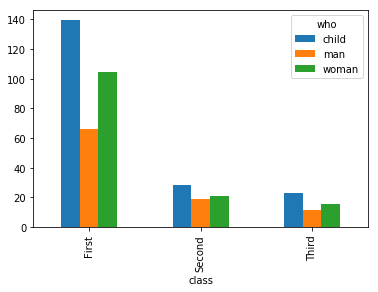

In [66]:
# This line turns on graphing in Jupyter 
%matplotlib inline

ticket_prices.plot(kind="bar")

### Extra Credit
---

**1. The index parameter of** `.pivot_table()` **can also take a list of column names, which will generate a  *heirarchical* index. A heirarchical index subdivides by multiple columns, resulting in a more fine-grained breakdown.**

**Create a pivot table to capture survival rate, with** `index=["embark town", "who"]` **and** `columns="class"`

Note: To fetch from a heirchical index, you have to specify a value for both columns in the index: `df.loc[('Cherbourg', 'man'), 'First']`

In [68]:
df.pivot_table('survived', index=['embark_town', 'who'], columns='class')

class                 First    Second     Third
embark_town who                                
Cherbourg   child       NaN  1.000000  0.733333
            man    0.404762  0.111111  0.205128
            woman  0.976744  1.000000  0.500000
Queenstown  child       NaN       NaN  0.200000
            man    0.000000  0.000000  0.085714
            woman  1.000000  1.000000  0.718750
Southampton child  0.833333  1.000000  0.342105
            man    0.328947  0.078652  0.110204
            woman  0.977778  0.898305  0.385714